# Customer Segmentation Using Clustering

## Problem Statement
Businesses struggle to personalize marketing without customer segmentation.

## Objective
Group customers into meaningful segments using unsupervised learning.

## Algorithm Used
K-Means Clustering

## Tools
Python, Pandas, Scikit-learn, Matplotlib


# Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Basic Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
df.shape

(200, 6)

In [27]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64

In [31]:
df.duplicated().sum()

0

# Data Preprocessing

Select Features

In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Feature Scaling

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Finding Optimal Number of Clusters (Elbow Method)

C:\Users\mandeep prajapati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mandeep prajapati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mandeep prajapati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mandeep prajapati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a

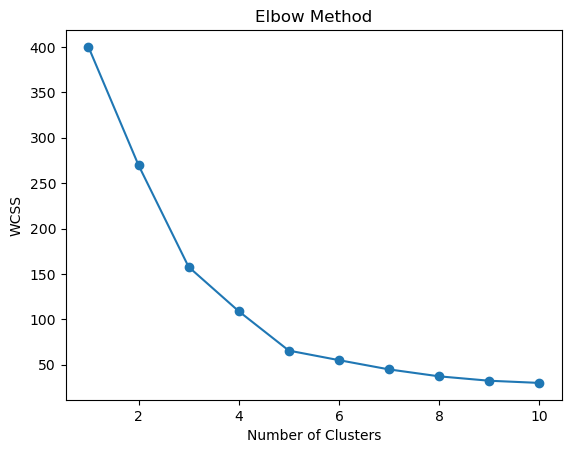

In [7]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [8]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

print(df)


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       0   19                  15                      39
1             2       0   21                  15                      81
2             3       1   20                  16                       6
3             4       1   23                  16                      77
4             5       1   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       1   35                 120                      79
196         197       1   45                 126                      28
197         198       0   32                 126                      74
198         199       0   32                 137                      18
199         200       0   30                 137                      83

[200 rows x 5 columns]


# Apply K-Means Clustering

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df


C:\Users\mandeep prajapati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mandeep prajapati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,4
1,2,0,21,15,81,2
2,3,1,20,16,6,4
3,4,1,23,16,77,2
4,5,1,31,17,40,4
...,...,...,...,...,...,...
195,196,1,35,120,79,1
196,197,1,45,126,28,3
197,198,0,32,126,74,1
198,199,0,32,137,18,3


# Visualize Customer Segments

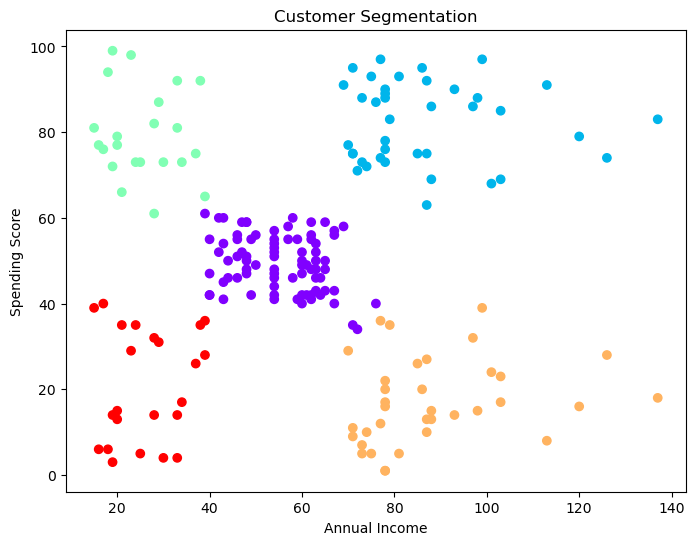

In [10]:
plt.figure(figsize=(8,6))

plt.scatter(df['Annual Income (k$)'],
            df['Spending Score (1-100)'],
            c=df['Cluster'],
            cmap='rainbow')

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation")
plt.show()


# Cluster Centers

In [11]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers


array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

# Customer Segment Profiling

In [12]:
df.groupby('Cluster').mean()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,86.320988,0.592593,42.716049,55.296296,49.518519
1,162.000000,0.538462,32.692308,86.538462,82.128205
2,23.090909,0.590909,25.272727,25.727273,79.363636
3,164.371429,0.457143,41.114286,88.200000,17.114286
4,23.000000,0.608696,45.217391,26.304348,20.913043


# Interpretation




# Predict Cluster for New Customers

Create New Customer Data

In [13]:
# New customer data
new_customer = pd.DataFrame({
    'Annual Income (k$)': [70],
    'Spending Score (1-100)': [75]
})

new_customer


,Annual Income (k$),Spending Score (1-100)
0,70,75


In [14]:
new_customer_scaled = scaler.transform(new_customer)


In [15]:
predicted_cluster = kmeans.predict(new_customer_scaled)

print("Customer belongs to Cluster:", predicted_cluster[0])


Customer belongs to Cluster: 1


# Predict Multiple Customers

In [16]:
new_customers = pd.DataFrame({
    'Annual Income (k$)': [25, 90, 60,],
    'Spending Score (1-100)': [80, 20, 50]
})

# Scale
new_customers_scaled = scaler.transform(new_customers)

# Predict
new_customers['Predicted Cluster'] = kmeans.predict(new_customers_scaled)

new_customers


,Annual Income (k$),Spending Score (1-100),Predicted Cluster
0,25,80,2
1,90,20,3
2,60,50,0


# Visualize New Customers on Graph

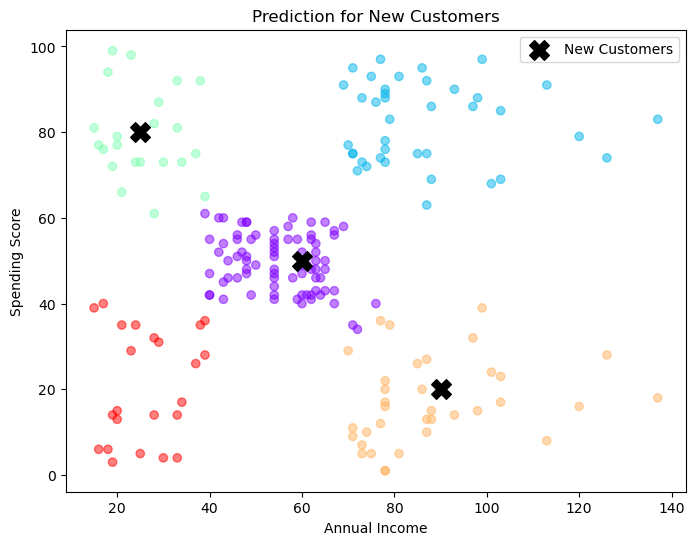

In [17]:
plt.figure(figsize=(8,6))

# Existing customers
plt.scatter(df['Annual Income (k$)'],
            df['Spending Score (1-100)'],
            c=df['Cluster'],
            cmap='rainbow',
            alpha=0.5)

# New customers
plt.scatter(new_customers['Annual Income (k$)'],
            new_customers['Spending Score (1-100)'],
            color='black',
            marker='X',
            s=200,
            label='New Customers')

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Prediction for New Customers")
plt.legend()
plt.show()


In [22]:
from sklearn.metrics import silhouette_score



In [23]:
sil_score = silhouette_score(X_scaled, clusters)

print("Silhouette Score:", sil_score)


Silhouette Score: 0.5546571631111091


In [24]:
df.to_csv("new_segmented_customers.csv", index=False)

In [25]:
new_df = pd.read_csv("new_segmented_customers.csv")
new_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,4
1,2,0,21,15,81,2
2,3,1,20,16,6,4
3,4,1,23,16,77,2
4,5,1,31,17,40,4
...,...,...,...,...,...,...
195,196,1,35,120,79,1
196,197,1,45,126,28,3
197,198,0,32,126,74,1
198,199,0,32,137,18,3
